In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline

# read the data

In [4]:
#read thru this link to know more abput the data
#https://archive.ics.uci.edu/ml/datasets/Adult
#lets read the data directly from the website
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Salary'])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [15]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [17]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [29]:
df1=pd.get_dummies((df.drop(["age","capital-gain","capital-loss","hours-per-week","Salary"],axis=1)),drop_first=True)
df_new=pd.concat([df,df1],axis=1)

In [31]:
df1.head()

,fnlwgt,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,77516,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,83311,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,215646,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,234721,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,338409,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df2=df_new.drop(["workclass",'fnlwgt',"education","marital-status","occupation","relationship","race","sex","native-country"],axis=1)
df2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Salary,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#dependent variable is whether the person earns >50k or <=50k

In [33]:
df2.shape

(32561, 101)

In [34]:
df2.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', 'education-num', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=101)

In [35]:
indep=list(df2.columns)

In [36]:
indep.remove(indep[5])

In [37]:
indep

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'education-num',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'o

# split the data 

In [38]:
#split the data into train & test using a random seed. Take seed as  1 so that all get the same answer
#take all columns as IV and <=50K as Dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[indep],df2['Salary'],test_size=0.3,random_state=0)




# hOMEWORK TASK 

In [ ]:
#build a Decision tree and give the max_depth as a variable x. Keep this Code in a loop and start the
#variable from depth(x)=1 to depth x=50... 
#using this predict on the train data and also on the test data....
#keep saving the accuracy for both train and test data INTO 2 VARIABLES (LISTS/ARAYS) and for each depth (1 to 50) and finally prepare 
# 2 plots...



# ALL THE BEST!!

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [40]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [42]:
Train_A=[]
Test_A=[]
for x in range(1,51):
    cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=x)
    cl_tree=cl_tree.fit(X_train,y_train)
    pred_train=cl_tree.predict(X_train)
    pred_test=cl_tree.predict(X_test)
    Train_A.append(accuracy_score(y_train,pred_train))
    Test_A.append(accuracy_score(y_test,pred_test))


In [75]:
a1=pd.DataFrame(Train_A,columns=['Train_A'])

In [77]:
a2=pd.DataFrame(Test_A,columns=['Test_A'])

array([ 0.75821476,  0.82792507,  0.84440577,  0.84409868,  0.85136657,
        0.85525642,  0.8564848 ,  0.85720135,  0.85576825,  0.8564848 ,
        0.8561777 ,  0.85310677,  0.84890982,  0.84798854,  0.8446105 ,
        0.84338213,  0.84276794,  0.83877572,  0.83775207,  0.83611424,
        0.83058655,  0.83068891,  0.82700379,  0.82567305,  0.8263896 ,
        0.8249565 ,  0.82301157,  0.82393285,  0.82178319,  0.82249974,
        0.82270447,  0.82014536,  0.81738151,  0.81727915,  0.81727915,
        0.81881462,  0.81738151,  0.81748388,  0.8179957 ,  0.81768861,
        0.81686969,  0.81860989,  0.81809807,  0.81758624,  0.81809807,
        0.81758624,  0.81758624,  0.81758624,  0.81758624,  0.81758624])

In [78]:
df_com=pd.concat([a1,a2],axis=1)

In [80]:
df_com['diff']=df_com['Train_A']-df_com['Test_A']

In [84]:
df_com[df_com['diff'] < 0.06]

,Train_A,Test_A,diff
0,0.759609,0.758215,0.001394
1,0.828361,0.827925,0.000436
2,0.843629,0.844406,-0.000776
3,0.843893,0.844099,-0.000206
4,0.852141,0.851367,0.000775
5,0.857011,0.855256,0.001755
6,0.859819,0.856485,0.003334
7,0.862320,0.857201,0.005119
8,0.868550,0.855768,0.012782
9,0.871007,0.856485,0.014523


In [ ]:
#plot #1-------- for training data
#x axis shud be depth (1 to 50)
#y axi shud be train data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud
#gradually increase...as depth increasees


#plot #2---- for test data
#x axis shud be depth (1 to 50)
#y axi shud be test data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud 
#gradually increase for higher depth and then strat decreasing again...as depth beocmes too big..
# this will be due to OVERfittinG...

# through this Homework OVERFITTING SHUD BE CLEAR TO YOU IN DECISION TREEE.......
#U CAN DISCUSS WITHIN YOUSELVESS... 

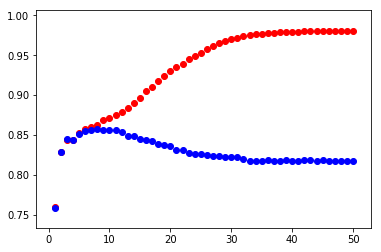

In [48]:
plt.scatter(range(1,51),Train_A,color='red')
plt.scatter(range(1,51),Test_A,color='blue')